<font size = 4> Dictionary Mapping can be applied in 2 situations. The first is when data are raw reviews without any annotation, the second is when each review has keywords information.

In [28]:
import numpy as np
import pandas as pd
import nltk

In [29]:
# Read Data
df=pd.read_csv('ABSA16_Restaurants_Train_SB1_v2.csv', sep=',')
df_test = pd.read_csv('EN_REST_SB1_TEST_gold.csv',sep=',')

# Raw reviews


In [30]:
## Define functions we are going to use
from collections import defaultdict
def processing_data(dataframe):
    '''
    
    :param dataframe:  dataset dataframe
    :return:  a dictionary, key is sentence and value should be their categories
    '''
    new_df = dataframe
    new_df.category = new_df.category.apply(lambda x: x.split('#')[0] if x is not np.NaN else x)
    # the next line aims to lowercase the sentence. In this case we don't need it.
    # new_df.sentence = new_df.sentence.apply(lambda x: x.lower()
    data_dict = defaultdict(set)
    for row in new_df[['category', 'sentence']].iterrows():
        if row[1].category:
            data_dict[row[1].sentence] |= {row[1].category}
    return data_dict

def sentenceDicMapping(dictionary, data_dict):
    '''

    :param dictionary: the dictionary we used to mapping
    :param data_dict: the key would be sentence, the value would be their categories
    :return: prediction_dict and prediction result
    '''
    results_dict = {'TOTAL': {'prediction': 0, 'accurate': 0},
                    'FOOD': {'prediction': 0, 'accurate': 0},
                    'AMBIENCE': {'prediction': 0, 'accurate': 0},
                    'SERVICE': {'prediction': 0, 'accurate': 0},
                    'LOCATION': {'prediction': 0, 'accurate': 0},
                    'PROMOTION': {'prediction': 0, 'accurate': 0}, }

    prediction_dict = {}
    for sentence in data_dict:
        prediction = set()
        for key in dictionary:
            if any([word in sentence.split() for word in dictionary[key]]):
                prediction |= {key}
                results_dict[key]['prediction'] += 1
                if key in data_dict[sentence]:
                    results_dict[key]['accurate'] += 1
        if len(prediction) > 0:
            results_dict['TOTAL']['prediction'] += 1
            prediction_dict[sentence] = prediction
            if 'PROMOTION' in prediction:
                # Promotion is the category that we defined ourselves,
                # so we want to print it out to see whether it make sense or not
                # print('Sentence predicted to Promotion:',sentence)
                pass
            if prediction == data_dict[sentence]:
                results_dict['TOTAL']['accurate'] += 1

        else:
            prediction_dict[sentence] = None
    return prediction_dict, results_dict

def evalution(results_dict, dataframe):
    '''
    
    :param results_dict: the dictionary that generated by Dictionary Mapping Method
    :param dataframe: The dataset we are going to test. For calculate the whole category number.
    :return: Support, F1, Recall, Precision of each category and total results
    '''
    eval_dict = {}
    category_count = dataframe.category.apply(lambda x: x.split('#')[0] if x is not np.NaN else x).value_counts()
    category_count['TOTAL'] = sum(category_count)
    for key in results_dict:
        if key == 'PROMOTION':
            continue
        precision = round(results_dict[key]['accurate'] / results_dict[key]['prediction'], 2)
        recall = round(results_dict[key]['accurate'] / category_count[key], 2)
        support = round(category_count[key] / category_count['TOTAL'], 2)
        f1 = round(2 * ((precision * recall) / (precision + recall)), 2)
        eval_dict[key] = {'support': support, 'precision': precision,
                          'recall': recall, 'f1': f1}
    return eval_dict

In [31]:
# Processing the data set, tranform it into dictionary format
test_dict = processing_data(df_test)
train_dict = processing_data(df)
test_dict

defaultdict(set,
            {'$6 with tip.': {'RESTAURANT'},
             '- Mediocre Service/Quality': {'SERVICE'},
             '10!': {'RESTAURANT'},
             '6pm on a Sat before a Broadway play and we were quickly seated and served.': {'SERVICE'},
             'A brief conversation with the manager at the end of the meal was the greatest disappointment--to say we had been "blown off" would be an understatement.': {'SERVICE'},
             'A cozy spot for 2': {'AMBIENCE'},
             'A perfect place to take out of town guests any time of the year.': {'RESTAURANT'},
             'AMAZING.': {'RESTAURANT'},
             'AVOID THE PLACE': {'RESTAURANT'},
             'Absolutely delicious.': {'FOOD'},
             'Addicting!': {'RESTAURANT'},
             'After one member of our party had been bumped repeatedly by a waitress, a polite request that he not be bumped sent the waitress into an abusive rant.': {'SERVICE'},
             "After sitting at the bar for over 20 minu

In [32]:
# cluster result from Aspect Detection, regard it as dictionary
Location = {'limited', 'fair', 'native', 'nearby', 'firm', 'st', 'square', 'cooperative', 'co', 'company', 'avenue',
            'downtown', 'street', 'upstate', 'ave', 'east', 'west', 'south', 'midtown'}
Ambience = {'vibe', 'acidity', 'compliment', 'quantity', 'amount', 'tranquility', 'acknowledgement', 'décor',
            'distraction', 'expectation', 'hassle', 'cleanliness', 'professionalism', 'drawback', 'thrill',
            'acknowledgment', 'ambience', 'dearth', 'ambiance', 'rudeness', 'freshness', 'heaviness', 'deportment',
            'occassion', 'triviality', 'encyclopedicity', 'talk-pages', 'meaningfulness', 'monumentality',
            'ingratitude', 'unlikelihood', 'over-representation', 'lightness', 'side-note', 'arbitrariness',
            'craftmanship', 'advocation', 'unpredictability', 'straightness', 'triviality', 'poignancy', 'frugality',
            'sparsity', 'clumsiness', 'opulence', 'pronouncement', 'obstinacy', 'smoothness', 'off-chance', 'occassion',
            'newsworthiness', 'surfeit', 'roundness', 'loveliness', 'intimation', 'vibrancy', 'looseness',
            'combativeness', 'heaviness', 'ostentation', 'repudiation', 'non-availability', 'subtlety', 'sidenote',
            'intricacy', 'sociability', 'substantiation', 'sloppiness', 'dullness', 'ruggedness', 'explication',
            'denouncement', 'non-inclusion', 'footstep', 'unavailability', 'candour', 'quirkiness', 'offensiveness',
            'exuberance', 'uprightness', 'docility', 'recognition', 'fierceness', 'harrasment', 'vindictiveness',
            'tendentiousness', 'salesmanship', 'say-so', 'thoughtfulness', 'glut', 'liveliness', 'shrewdness',
            'expressiveness', 'admonishment', 'ambiance', 'scarcity', 'idiocy', 'musicality', "article''",
            'atmospherics', 'sameness', 'overabundance', 'insolence', 'vivacity', 'discourtesy', 'playthrough',
            'paucity', 'condescension', 'gentility', 'wildness', 'uselessness', 'unimportance', 'level-headedness',
            'stillness', 'time-scale', 'repetitiveness', 'time-period', 'sagacity', 'misattribution', 'imputation',
            'flamboyance', 'recklessness', 'balladry', 'meekness', 'implausibility', 'sweetness', 'verticality',
            'vividness', 'bloggingheads', 'messageboard', 'approbation', 'derogation', 'sparseness', 'sonority',
            'theatricality', 'ammount', 'occurance', 'under-representation', 'stubbornness', 'discog', 'wrongness',
            'preponderance', 'thinness', 'disproportion', 'spontaneity', 'worthlessness', 'bluntness', 'manliness',
            'plenitude', 'coarseness', 'coldness', 'neatness', 'sceneries', 'rawness', 'non-neutrality', 'physicality',
            'imprecision', 'atricle', 'oversupply', 'probity', 'carelessness', 'congratulation', 'politicisation',
            'sonorities', 'urbanity', 'defensiveness', 'décor', 'pervasiveness', 'dearth', 'draftsmanship', 'lyricism',
            'soundscape', 'bleakness', 'statesmanship', "'net", 'topicality', 'scoresheet', 'lenr-canr', 'deportment',
            'solidity', 'badness', 'exoneration', 'affirmation', 'artificiality', 'cheerfulness', 'obviousness',
            'cheapness', 'acknowledgement', 'dynamism', 'nastiness', 'evasiveness',
            'playfulness', 'softness', 'uncivility', 'mammogram', 'reassurance', 'acknowledgment', 'directness',
            'acount', 'corroboration', 'falseness', 'soundscapes', 'reaffirmation', 'exoticism', 'belligerence',
            'quietness', 'recantation', 'ridiculousness', 'ambience', 'over-use', 'inadequacy', 'draughtsmanship',
            'decisiveness', 'expiation', 'cluelessness', 'disruptiveness', 'spambot', 'conferral', 'believability',
            'resubmission', 'discouragement', 'fuzziness', 'hardwork', 'legitimization', 'spaciousness', 'irrelevancy',
            'circularity', 'rudeness', 'freshness', 'tardiness', 'clearness', 'subhead'}
Service = {'wing', 'fan', 'bench', 'escort', 'crowd', 'force', 'board', 'team', 'crew', 'staff'}
Promotion = {'open', 'statue', 'seat', 'tender', 'pick', 'prix', 'choice', 'landmark', 'runner', 'classic', 'starter',
             'attraction', 'event', 'concession', 'selection', 'prize', 'winner', 'gift', 'trophy', 'silverware',
             'award', 'accolade', 'sweepstakes'}
Food_300 = {'defiantly', 'hideously', 'shanty', 'edible', 'weehawken', 'indochinese', 'subpar', 'strawberry',
            'predictably', 'horrible', 'sesame', 'cheerfully', 'towel', 'absurdly', 'napkin', 'pear', 
            'singlehandedly', 'messy', 'oyster', 'knuckle', 'jelly', 'gigantic', 'accidently', 'plentiful', 
            'vins', 'popcorn', 'amazingly', 'edgewater', 'unattractive', 'urchin', 'noisy', 'gyro', 'rudely', 'dizzy',
            'essa', 'aint', 'delightfully', 'baluchi', 'adn', 'appetizer', 'inventive', 'foreseeable', 'clumsy', 'bts',
            'outrageously', 'mutter', 'unfriendly', 'kha', 'biscuit', 'unappealing', 'awful', 'cucumber', 'dismal', 
            'minnow', 'definetly', 'spicy', 'suan', 'pleasantly', 'hutner', 'tomato', 'prob', 'unheralded', 'terrific',
            'tilapia', 'scandalous', 'pacifico', 'brunch', 'gorgeous', 'lobster', 'mcdonalds', 'orsay', 'wannabe', 
            'halibut', 'thier', 'cordial', 'unassuming', 'shoppe', 'cute', 'tequila', 'discreet', 'usha', 'ripoff',
            'overdone', 'asparagus', 'mignon', 'bz', 'funky', 'repulsive', 'pineapple', 'lovely', 'gulab', 'horrid',
            'vanilla', 'yum', 'delusional', 'spinach', 'speechless', 'unbelievable', 'andor', 'cosette', 'smoky', 
            'salty', 'joya', 'goer', 'tamarind', 'unwelcoming', 'inedible', 'stylish', 'udon', 'otherworldly', 
            'patroon', 'brasserie', 'sushi', 'grunt', 'bbq', 'bfc', 'toon', 'balthazar', 'noodle', 'lemony', 
            'portobello', 'unprofessional', 'indo', 'incomparable', 'taco', 'delicious', 'jem', 'preposterous', 
            'picky', 'quaint', 'pita', 'creamy', 'phenomenal', 'sensual', 'marsala', 'lousy', 'tacos', 'cozy', 
            'impeccable', 'penne', 'yon', 'tripe', 'blueberry', 'peeve', 'yuka', 'maitre', 'congee', 'tart', 'veal',
            'oily', 'roti', 'delightful', 'chilli', 'chutney', 'pathetic', 'caviar', 'pretentious', 'cuz', 'calamari', 
            'inhouse', 'quintessential', 'scary', 'chowder', 'trendy', 'mahi', 'watery', 'sepia', 'undercooked', 
            'thalia', 'maggot', 'whos', 'casserole', 'bouche', 'scammer', 'custard', 'pastis', 'greengrass', 
            'hideous', 'sleek', 'lollipop', 'amex', 'juicy', 'ow', 'zucchero', 'volar', 'ghastly', 'teodora',
            'skimpy', 'particulary', 'farro', 'expresso', 'jsut', 'crappy', 'lox', 'haru', 'chuckie', 'fishy', 
            'uber', 'eggplant', 'uncooked', 'yawn', 'kimchi', 'unobtrusive', 'miso', 'gari', 'ciao', 'mozzarella',
            'raucous', 'youre', 'turnip', 'lolly', 'molto', 'smug', 'tapa', 'donut', 'spotty', 'sardine', 'unhygienic',
            'ino', 'bagel', 'mousse', 'forgivable', 'unhurried', 'uws', 'unpretentious', 'truffle', 'svc', 'fluffy',
            'fav', 'tikka', 'barnyard', 'bubbly', 'crispy', 'puree', 'tatsu', 'appetizing', 'unisex', 'entree', 
            'homey', 'flavorful', 'slimy', 'vts', 'sassy', 'hipster', 'tasty', 'cheesecake', 'greasy', 'dreamy',
            'cheeseburger', 'fellas', 'tasteless', 'brassiere', 'buttery', 'wtf', 'drumstick', 'pistachio', 'tamari', 
            'pesto', 'ravioli', 'soh', 'yummy', 'classy', 'crunchy', 'hookah', 'takeout', 'risotto', 'tupperware',
            'yellowtail', 'touristy', 'insideout', 'snobby', 'parmesan', 'hummus', 'soggy', 'sashimi', 'pricey', 
            'naan', 'soupy', 'frizzy', 'artsy', 'nyi', 'kiku', 'ceviche', 'bisque', 'laidback', 'nobu', 'tipsy', 
            'balsamic', 'pepperoni', 'guacamole', 'sizzle', 'bbe', 'filet', 'lasagna', 'pastrami', 'tempura', 
            'theyre', 'mizu', 'yorkie', 'yuzu'}

cluster_dictionary = {}
cluster_dictionary['SERVICE'] = Service
cluster_dictionary['PROMOTION'] = Promotion
cluster_dictionary['LOCATION'] = Location
cluster_dictionary['FOOD'] = Food_300
cluster_dictionary['AMBIENCE'] = Ambience

In [33]:
# Build additional dictionary from common sense and internet.
additional_dict = {}
additional_dict['SERVICE'] = {'rude','wait','attitude','staff','waiter','server'}

additional_dict['FOOD'] = {'tea','onion','onions','chicken','shrimp','beef','pork',
             'rice','honey','food','soup','cheese','salad','potato',
             'tomato','pizza','steak', 'lamb', 'crab', 'crabs', 'fish', 'seafood', 'lobster',
             'sushi', 'eel', 'oyster', 'tuna'
             'cake', 'cakes', 'brocolli', 'egg'
            }
additional_dict['DRINKS'] = {'coffee','latte','beer','juice'}

In [34]:
# Expend these word into clustering dictionary
cluster_dictionary['FOOD'] |= additional_dict['FOOD']
cluster_dictionary['SERVICE'] |= additional_dict['SERVICE']

In [35]:
# Mapping category with sentence.

cluster_prediction_dict_train, cluster_results_dict_train = sentenceDicMapping(cluster_dictionary, train_dict)

cluster_prediction_dict_test, cluster_results_dict_test = sentenceDicMapping(cluster_dictionary, test_dict)
        
print('\n\n Prediction on train: ',cluster_results_dict_train)
print('\n\n Prediction on test: ',cluster_results_dict_test)



 Prediction on train:  {'TOTAL': {'prediction': 687, 'accurate': 318}, 'FOOD': {'prediction': 561, 'accurate': 412}, 'AMBIENCE': {'prediction': 30, 'accurate': 16}, 'SERVICE': {'prediction': 92, 'accurate': 73}, 'LOCATION': {'prediction': 34, 'accurate': 2}, 'PROMOTION': {'prediction': 36, 'accurate': 0}}


 Prediction on test:  {'TOTAL': {'prediction': 194, 'accurate': 98}, 'FOOD': {'prediction': 151, 'accurate': 126}, 'AMBIENCE': {'prediction': 11, 'accurate': 6}, 'SERVICE': {'prediction': 33, 'accurate': 24}, 'LOCATION': {'prediction': 6, 'accurate': 0}, 'PROMOTION': {'prediction': 13, 'accurate': 0}}


In [36]:
# Calculate F1, precision, recall, and support
train = evalution(cluster_results_dict_train, df)
test = evalution(cluster_results_dict_test, df_test)

print('\n The evaluation on train data set are:\n', train)
print('\n The evaluation on test data set are:\n', test)


 The evaluation on train data set are:
 {'TOTAL': {'support': 1.0, 'precision': 0.46, 'recall': 0.13, 'f1': 0.2}, 'FOOD': {'support': 0.43, 'precision': 0.73, 'recall': 0.38, 'f1': 0.5}, 'AMBIENCE': {'support': 0.1, 'precision': 0.53, 'recall': 0.06, 'f1': 0.11}, 'SERVICE': {'support': 0.18, 'precision': 0.79, 'recall': 0.16, 'f1': 0.27}, 'LOCATION': {'support': 0.01, 'precision': 0.06, 'recall': 0.07, 'f1': 0.06}}

 The evaluation on test data set are:
 {'TOTAL': {'support': 1.0, 'precision': 0.51, 'recall': 0.11, 'f1': 0.18}, 'FOOD': {'support': 0.46, 'precision': 0.83, 'recall': 0.32, 'f1': 0.46}, 'AMBIENCE': {'support': 0.08, 'precision': 0.55, 'recall': 0.09, 'f1': 0.15}, 'SERVICE': {'support': 0.18, 'precision': 0.73, 'recall': 0.15, 'f1': 0.25}, 'LOCATION': {'support': 0.02, 'precision': 0.0, 'recall': 0.0, 'f1': nan}}


/Users/youyang/virtualenvs/AML/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


We also want to explore the relationship between dictionary size and F1, recall, presicion.

In [37]:
Food_100 = {'yawn', 'kimchi', 'unobtrusive', 'miso', 'gari', 'ciao', 'mozzarella', 
        'raucous', 'youre', 'turnip', 'lolly', 'molto', 'smug', 'tapa', 'donut', 'spotty',
        'sardine', 'unhygienic', 'ino', 'bagel', 'mousse', 'forgivable', 'unhurried', 'uws',
        'unpretentious', 'truffle', 'svc', 'fluffy', 'fav', 'tikka', 'barnyard', 'bubbly', 'crispy',
        'puree', 'tatsu', 'appetizing', 'unisex', 'entree', 'homey', 'flavorful', 'slimy', 'vts', 'sassy', 
        'hipster', 'tasty', 'cheesecake', 'greasy', 'dreamy', 'cheeseburger', 'fellas', 'tasteless', 'brassiere',
        'buttery', 'wtf', 'drumstick', 'pistachio', 'tamari', 'pesto', 'ravioli', 'soh', 'yummy', 'classy', 'crunchy',
        'hookah', 'takeout', 'risotto', 'tupperware', 'yellowtail', 'touristy', 'insideout', 'snobby', 'parmesan', 
        'hummus', 'soggy', 'sashimi', 'pricey', 'naan', 'soupy', 'frizzy', 'artsy', 'nyi', 'kiku', 'ceviche', 'bisque',
        'laidback', 'nobu', 'tipsy', 'balsamic', 'pepperoni', 'guacamole', 'sizzle', 'bbe', 'filet', 'lasagna', 'pastrami',
        'tempura', 'theyre', 'mizu', 'yorkie', 'yuzu'}
Food_200 = {'smoky', 'salty', 'joya', 'goer', 'tamarind', 'unwelcoming', 'inedible', 'stylish', 'udon',
            'otherworldly', 'patroon', 'brasserie', 'sushi', 'grunt', 'bbq', 'bfc', 'toon', 'balthazar', 'noodle', 
            'lemony', 'portobello', 'unprofessional', 'indo', 'incomparable', 'taco', 'delicious', 'jem',
            'preposterous', 'picky', 'quaint', 'pita', 'creamy', 'phenomenal', 'sensual', 'marsala', 'lousy',
            'tacos', 'cozy', 'impeccable', 'penne', 'yon', 'tripe', 'blueberry', 'peeve', 'yuka', 'maitre', 'congee',
            'tart', 'veal', 'oily', 'roti', 'delightful', 'chilli', 'chutney', 'pathetic', 'caviar', 'pretentious',
            'cuz', 'calamari', 'inhouse', 'quintessential', 'scary', 'chowder', 'trendy', 'mahi', 'watery', 'sepia',
            'undercooked', 'thalia', 'maggot', 'whos', 'casserole', 'bouche', 'scammer', 'custard', 'pastis',
            'greengrass', 'hideous', 'sleek', 'lollipop', 'amex', 'juicy', 'ow', 'zucchero', 'volar', 'ghastly', 
            'teodora', 'skimpy', 'particulary', 'farro', 'expresso', 'jsut', 'crappy', 'lox', 'haru', 'chuckie',
            'fishy', 'uber', 'eggplant', 'uncooked', 'yawn', 'kimchi', 'unobtrusive', 'miso', 'gari', 'ciao', 
            'mozzarella', 'raucous', 'youre', 'turnip', 'lolly', 'molto', 'smug', 'tapa', 'donut', 'spotty',
            'sardine', 'unhygienic', 'ino', 'bagel', 'mousse', 'forgivable', 'unhurried', 'uws', 'unpretentious',
            'truffle', 'svc', 'fluffy', 'fav', 'tikka', 'barnyard', 'bubbly', 'crispy', 'puree', 'tatsu', 'appetizing',
            'unisex', 'entree', 'homey', 'flavorful', 'slimy', 'vts', 'sassy', 'hipster', 'tasty', 'cheesecake',
            'greasy', 'dreamy', 'cheeseburger', 'fellas', 'tasteless', 'brassiere', 'buttery', 'wtf', 'drumstick',
            'pistachio', 'tamari', 'pesto', 'ravioli', 'soh', 'yummy', 'classy', 'crunchy', 'hookah', 'takeout',
            'risotto', 'tupperware', 'yellowtail', 'touristy', 'insideout', 'snobby', 'parmesan', 'hummus', 'soggy',
            'sashimi', 'pricey', 'naan', 'soupy', 'frizzy', 'artsy', 'nyi', 'kiku', 'ceviche', 'bisque', 'laidback',
            'nobu', 'tipsy', 'balsamic', 'pepperoni', 'guacamole', 'sizzle', 'bbe', 'filet', 'lasagna', 'pastrami', 
            'tempura', 'theyre', 'mizu', 'yorkie', 'yuzu'}
Food_300 = {'defiantly', 'hideously', 'shanty', 'edible', 'weehawken', 'indochinese', 'subpar', 'strawberry',
            'predictably', 'horrible', 'sesame', 'cheerfully', 'towel', 'absurdly', 'napkin', 'pear', 
            'singlehandedly', 'messy', 'oyster', 'knuckle', 'jelly', 'gigantic', 'accidently', 'plentiful', 
            'vins', 'popcorn', 'amazingly', 'edgewater', 'unattractive', 'urchin', 'noisy', 'gyro', 'rudely', 'dizzy',
            'essa', 'aint', 'delightfully', 'baluchi', 'adn', 'appetizer', 'inventive', 'foreseeable', 'clumsy', 'bts',
            'outrageously', 'mutter', 'unfriendly', 'kha', 'biscuit', 'unappealing', 'awful', 'cucumber', 'dismal', 
            'minnow', 'definetly', 'spicy', 'suan', 'pleasantly', 'hutner', 'tomato', 'prob', 'unheralded', 'terrific',
            'tilapia', 'scandalous', 'pacifico', 'brunch', 'gorgeous', 'lobster', 'mcdonalds', 'orsay', 'wannabe', 
            'halibut', 'thier', 'cordial', 'unassuming', 'shoppe', 'cute', 'tequila', 'discreet', 'usha', 'ripoff',
            'overdone', 'asparagus', 'mignon', 'bz', 'funky', 'repulsive', 'pineapple', 'lovely', 'gulab', 'horrid',
            'vanilla', 'yum', 'delusional', 'spinach', 'speechless', 'unbelievable', 'andor', 'cosette', 'smoky', 
            'salty', 'joya', 'goer', 'tamarind', 'unwelcoming', 'inedible', 'stylish', 'udon', 'otherworldly', 
            'patroon', 'brasserie', 'sushi', 'grunt', 'bbq', 'bfc', 'toon', 'balthazar', 'noodle', 'lemony', 
            'portobello', 'unprofessional', 'indo', 'incomparable', 'taco', 'delicious', 'jem', 'preposterous', 
            'picky', 'quaint', 'pita', 'creamy', 'phenomenal', 'sensual', 'marsala', 'lousy', 'tacos', 'cozy', 
            'impeccable', 'penne', 'yon', 'tripe', 'blueberry', 'peeve', 'yuka', 'maitre', 'congee', 'tart', 'veal',
            'oily', 'roti', 'delightful', 'chilli', 'chutney', 'pathetic', 'caviar', 'pretentious', 'cuz', 'calamari', 
            'inhouse', 'quintessential', 'scary', 'chowder', 'trendy', 'mahi', 'watery', 'sepia', 'undercooked', 
            'thalia', 'maggot', 'whos', 'casserole', 'bouche', 'scammer', 'custard', 'pastis', 'greengrass', 
            'hideous', 'sleek', 'lollipop', 'amex', 'juicy', 'ow', 'zucchero', 'volar', 'ghastly', 'teodora',
            'skimpy', 'particulary', 'farro', 'expresso', 'jsut', 'crappy', 'lox', 'haru', 'chuckie', 'fishy', 
            'uber', 'eggplant', 'uncooked', 'yawn', 'kimchi', 'unobtrusive', 'miso', 'gari', 'ciao', 'mozzarella',
            'raucous', 'youre', 'turnip', 'lolly', 'molto', 'smug', 'tapa', 'donut', 'spotty', 'sardine', 'unhygienic',
            'ino', 'bagel', 'mousse', 'forgivable', 'unhurried', 'uws', 'unpretentious', 'truffle', 'svc', 'fluffy',
            'fav', 'tikka', 'barnyard', 'bubbly', 'crispy', 'puree', 'tatsu', 'appetizing', 'unisex', 'entree', 
            'homey', 'flavorful', 'slimy', 'vts', 'sassy', 'hipster', 'tasty', 'cheesecake', 'greasy', 'dreamy',
            'cheeseburger', 'fellas', 'tasteless', 'brassiere', 'buttery', 'wtf', 'drumstick', 'pistachio', 'tamari', 
            'pesto', 'ravioli', 'soh', 'yummy', 'classy', 'crunchy', 'hookah', 'takeout', 'risotto', 'tupperware',
            'yellowtail', 'touristy', 'insideout', 'snobby', 'parmesan', 'hummus', 'soggy', 'sashimi', 'pricey', 
            'naan', 'soupy', 'frizzy', 'artsy', 'nyi', 'kiku', 'ceviche', 'bisque', 'laidback', 'nobu', 'tipsy', 
            'balsamic', 'pepperoni', 'guacamole', 'sizzle', 'bbe', 'filet', 'lasagna', 'pastrami', 'tempura', 
            'theyre', 'mizu', 'yorkie', 'yuzu'}

In [38]:
cluster_dictionary['FOOD'] = Food_100
cluster_prediction_dict_100, cluster_results_dict_100 = sentenceDicMapping(cluster_dictionary, test_dict)
print('\n\n Prediction with 100 Food words: ', cluster_results_dict_100)
evalution(cluster_results_dict_100, df_test)



 Prediction with 100 Food words:  {'TOTAL': {'prediction': 82, 'accurate': 30}, 'FOOD': {'prediction': 22, 'accurate': 18}, 'AMBIENCE': {'prediction': 11, 'accurate': 6}, 'SERVICE': {'prediction': 33, 'accurate': 24}, 'LOCATION': {'prediction': 6, 'accurate': 0}, 'PROMOTION': {'prediction': 13, 'accurate': 0}}


/Users/youyang/virtualenvs/AML/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


{'AMBIENCE': {'f1': 0.15, 'precision': 0.55, 'recall': 0.09, 'support': 0.08},
 'FOOD': {'f1': 0.09, 'precision': 0.82, 'recall': 0.05, 'support': 0.46},
 'LOCATION': {'f1': nan, 'precision': 0.0, 'recall': 0.0, 'support': 0.02},
 'SERVICE': {'f1': 0.25, 'precision': 0.73, 'recall': 0.15, 'support': 0.18},
 'TOTAL': {'f1': 0.06, 'precision': 0.37, 'recall': 0.03, 'support': 1.0}}

In [39]:
cluster_dictionary['FOOD'] = Food_200
cluster_prediction_dict_200, cluster_results_dict_200 = sentenceDicMapping(cluster_dictionary, test_dict)
print('\n\n Prediction with 200 Food words: ', cluster_results_dict_200)
evalution(cluster_results_dict_200, df_test)



 Prediction with 200 Food words:  {'TOTAL': {'prediction': 106, 'accurate': 44}, 'FOOD': {'prediction': 52, 'accurate': 41}, 'AMBIENCE': {'prediction': 11, 'accurate': 6}, 'SERVICE': {'prediction': 33, 'accurate': 24}, 'LOCATION': {'prediction': 6, 'accurate': 0}, 'PROMOTION': {'prediction': 13, 'accurate': 0}}


/Users/youyang/virtualenvs/AML/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


{'AMBIENCE': {'f1': 0.15, 'precision': 0.55, 'recall': 0.09, 'support': 0.08},
 'FOOD': {'f1': 0.18, 'precision': 0.79, 'recall': 0.1, 'support': 0.46},
 'LOCATION': {'f1': nan, 'precision': 0.0, 'recall': 0.0, 'support': 0.02},
 'SERVICE': {'f1': 0.25, 'precision': 0.73, 'recall': 0.15, 'support': 0.18},
 'TOTAL': {'f1': 0.09, 'precision': 0.42, 'recall': 0.05, 'support': 1.0}}

In [40]:
cluster_dictionary['FOOD'] = Food_300
cluster_prediction_dict_300, cluster_results_dict_300 = sentenceDicMapping(cluster_dictionary, test_dict)
print('\n\n Prediction with 300 Food words: ', cluster_results_dict_300)
evalution(cluster_results_dict_300, df_test)



 Prediction with 300 Food words:  {'TOTAL': {'prediction': 116, 'accurate': 49}, 'FOOD': {'prediction': 66, 'accurate': 50}, 'AMBIENCE': {'prediction': 11, 'accurate': 6}, 'SERVICE': {'prediction': 33, 'accurate': 24}, 'LOCATION': {'prediction': 6, 'accurate': 0}, 'PROMOTION': {'prediction': 13, 'accurate': 0}}


/Users/youyang/virtualenvs/AML/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


{'AMBIENCE': {'f1': 0.15, 'precision': 0.55, 'recall': 0.09, 'support': 0.08},
 'FOOD': {'f1': 0.22, 'precision': 0.76, 'recall': 0.13, 'support': 0.46},
 'LOCATION': {'f1': nan, 'precision': 0.0, 'recall': 0.0, 'support': 0.02},
 'SERVICE': {'f1': 0.25, 'precision': 0.73, 'recall': 0.15, 'support': 0.18},
 'TOTAL': {'f1': 0.1, 'precision': 0.42, 'recall': 0.06, 'support': 1.0}}

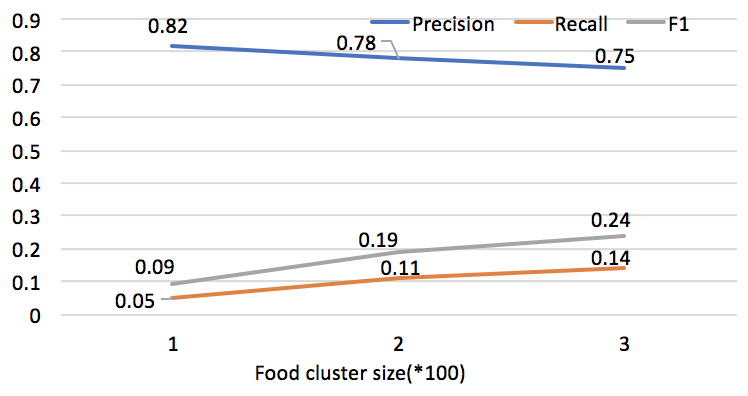
With the larger dictionary size of Food, the f1 and recall improve while the precision decrease. In this case we think this tradoff is acceptable.

# Reviews with keywords information

In [41]:
def genTopicDictionary(dataframe):
    '''
    This function aims to generate dictionary from train data set.
    The key would be the keywords/ target, the values are their categories.
    :param dataframe: The train data set
    :return: topic dictionary
    '''
    df = dataframe
    topic_dict = {}
    df.category = df.category.apply(lambda x: x.split('#')[0] if x is not np.NaN else x)
    df.target = df.target.apply(lambda x: x.lower() if x is not np.NaN else x)
    for item in df[['category','target']].iterrows():
        if item[1].category is not np.NaN and item[1].target is not np.NaN:
            topic_dict[item[1].target] = item[1].category
    return topic_dict

def keywordDicMapping(dictionary, dataframe, add_dict=additional_dict):
    '''
    This function will mapping each sentence to their categories
    :param dictionary: The topic dictionary
    :param dataframe: The test data set
    :param add_dict: The common sense or vocabulary from external data source
    :return: Mapping dictionary
    '''
    results_dict = {'TOTAL': {'prediction': 0, 'accurate': 0}, 'FOOD': {'prediction': 0, 'accurate': 0},
                    'RESTAURANT': {'prediction': 0, 'accurate': 0}, 'AMBIENCE': {'prediction': 0, 'accurate': 0},
                    'DRINKS': {'prediction': 0, 'accurate': 0}, 'SERVICE': {'prediction': 0, 'accurate': 0},
                    'LOCATION': {'prediction': 0, 'accurate': 0}}

    new_df = dataframe
    new_df.category = new_df.category.apply(lambda x: x.split('#')[0] if x is not np.NaN else x)
    new_df.sentence = new_df.sentence.apply(lambda x: x.lower())
    new_df.target = new_df.target.apply(lambda x: x.lower() if x is not np.NaN else x)
    for row in new_df[['category', 'sentence', 'target']].iterrows():
        if row[1].target in dictionary:
            category = dictionary[row[1].target]
            results_dict[category]['prediction'] += 1
            results_dict["TOTAL"]['prediction'] += 1
            if category == row[1].category:
                results_dict[category]['accurate'] += 1
                results_dict['TOTAL']['accurate'] += 1
            else:
                # print(row[1])
                pass
        elif row[1].target is np.NaN:
            if any([word in row[1].sentence.split() for word in add_dict['SERVICE']]):
                category = 'SERVICE'
                results_dict[category]['prediction'] += 1
                results_dict["TOTAL"]['prediction'] += 1
                if category == row[1].category:
                    results_dict[category]['accurate'] += 1
                    results_dict['TOTAL']['accurate'] += 1
                else:
                    pass
                    # print(row[1])
            else:
                pass
                # print(row[1])
        else:
            if any([key in row[1].target.split() for key in add_dict['FOOD']]):
                category = 'FOOD'
                results_dict[category]['prediction'] += 1
                results_dict["TOTAL"]['prediction'] += 1
                if category == row[1].category:
                    results_dict[category]['accurate'] += 1
                    results_dict['TOTAL']['accurate'] += 1
            elif any([key in row[1].target.split() for key in add_dict['SERVICE']]):
                category = 'SERVICE'
                results_dict[category]['prediction'] += 1
                results_dict["TOTAL"]['prediction'] += 1
                if category == row[1].category:
                    results_dict[category]['accurate'] += 1
                    results_dict['TOTAL']['accurate'] += 1
            else:
                # print(row[1])
                pass
    print(results_dict)
    return results_dict

In [42]:
# Generate dictionary
topic_dict = genTopicDictionary(df)
topic_dict

{'"salt encrusted shrimp" appetizer': 'FOOD',
 '$10 10-piece dim sum combo': 'FOOD',
 '1st ave spot': 'RESTAURANT',
 'actors': 'AMBIENCE',
 'al di la': 'RESTAURANT',
 'all you can eat deal': 'FOOD',
 'all you can eat sushi': 'FOOD',
 'all-u-can-eat sushi': 'FOOD',
 'ambiance': 'AMBIENCE',
 'ambience': 'AMBIENCE',
 'ambient': 'AMBIENCE',
 'amma': 'RESTAURANT',
 'anti-pasta': 'FOOD',
 'antipasti': 'FOOD',
 'appetizer': 'FOOD',
 'appetizer menu': 'FOOD',
 'appetizer of olives': 'FOOD',
 'appetizer selection': 'FOOD',
 'appetizers': 'FOOD',
 'apppetizers': 'FOOD',
 'areo': 'RESTAURANT',
 'arugula and goat cheese': 'FOOD',
 'asparagus, truffle oil, parmesan bruschetta': 'FOOD',
 'assorted sashimi': 'FOOD',
 'atmoshere': 'AMBIENCE',
 'atmoshpere': 'AMBIENCE',
 'atmosphere': 'AMBIENCE',
 'atomosphere': 'AMBIENCE',
 'baba ganoush': 'FOOD',
 'back garden area': 'AMBIENCE',
 'back garden sitting area': 'AMBIENCE',
 'back patio': 'AMBIENCE',
 'back room': 'AMBIENCE',
 'backyard dining area': 'AMB

In [43]:
# Get mapping results
keywords_result = keywordDicMapping(topic_dict, df_test)

{'TOTAL': {'prediction': 475, 'accurate': 451}, 'FOOD': {'prediction': 241, 'accurate': 238}, 'RESTAURANT': {'prediction': 58, 'accurate': 48}, 'AMBIENCE': {'prediction': 40, 'accurate': 36}, 'DRINKS': {'prediction': 25, 'accurate': 25}, 'SERVICE': {'prediction': 108, 'accurate': 101}, 'LOCATION': {'prediction': 3, 'accurate': 3}}


In [44]:
# Calculate F1, precision, recall, support
evalution(keywords_result, df_test)

{'AMBIENCE': {'f1': 0.68, 'precision': 0.9, 'recall': 0.55, 'support': 0.08},
 'DRINKS': {'f1': 0.8, 'precision': 1.0, 'recall': 0.66, 'support': 0.04},
 'FOOD': {'f1': 0.75, 'precision': 0.99, 'recall': 0.61, 'support': 0.46},
 'LOCATION': {'f1': 0.37, 'precision': 1.0, 'recall': 0.23, 'support': 0.02},
 'RESTAURANT': {'f1': 0.37,
  'precision': 0.83,
  'recall': 0.24,
  'support': 0.23},
 'SERVICE': {'f1': 0.77, 'precision': 0.94, 'recall': 0.65, 'support': 0.18},
 'TOTAL': {'f1': 0.68, 'precision': 0.95, 'recall': 0.53, 'support': 1.0}}

As we observe above, the results with keywords are much better than the raw data. This is because keywords provide more related information other than raw reviews. Future step could focus on extract keywords from raw reviews.